# NNLM(Neural Network Language Model)
- 참조 : [NNLM](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/29/NNLM/), [NNLM](https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/), [NNLM](https://brunch.co.kr/@goodvc78/16), [NNLM](https://lazyer.tistory.com/9), [NNLM](https://www.researchgate.net/figure/Architecture-of-the-continuous-space-NN-LM-The-input-words-are-w-i-n-1-w-i-1_fig1_221417189)

## 단어를 숫자로 바꾸기 위해 one-hot-vector
- 단어수가 많으면 차원수가 너무 커짐
- 두 단어의 내적이 0이 됨
    - 즉, 두 벡터가 직교한다는 의미 => one-hot-vector는 서로 독립

## 이러한 문제 해결하기 위해 분산표상(distributed representations) 등장
- 분산표상이 추구하는 건 듬성듬성한 벡터를 빽빽한 벡터로 바꿔 표현한 것
    - 데이터의 차원수를 줄이려는 것이 1차적 목적
    - 유사한 단어는 벡터공간에서 가깝게, 반대의 경우는 멀게 배치
    
## NNLM 개요
- 직전까지 등장한 n-1개 단어들로 n번째 단어를 맞추는 N-gram 모델
<img src = https://user-images.githubusercontent.com/28910538/54750523-50817480-4c1b-11e9-89f7-f0c6b21a34b5.png>
- 이 값을 최대화 시키는 쪽으로 weight update,, 분자를 크게 분모를 작게
- 단어들을 N개의 one-hot encoding으로 벡터화함
    - 여기서 단어들은 직전까지 등장한 n-1개의 단어들을 말함

###  input
<img src= https://user-images.githubusercontent.com/28910538/54796668-76972b00-4c94-11e9-8326-9d901d2df392.png>

- C는 m * |V| 크기를 갖는 매트릭스 (모든 요소는 초기에 랜덤 설정)
- w<sub>t</sub>는 t번째 단어에 대한 One-hot-Vector
- C와 w<sub>t</sub>의 내적은 C라는 행렬에서 t번째 열만 참조(lookup)하는 것과 본질적으로 같음
        
### output
![image](https://user-images.githubusercontent.com/28910538/54797055-fa9de280-4c95-11e9-8e3d-e1497f8847f2.png)

- y<sub>wt</sub>는 w<sub>t</sub>라는 단어에 해당하는 score vector(전체 합 1인)임
    - 그 크기는 말뭉치 전체의 단어수(V)차원
- 확률값이 가장 높은 요소의 인덱스에 해당하는 단어가 실제 정답 단어와 일치하도록 학습 진행
- 정답 인덱스에 해당하는 스코어(분자)를 높이고, 나머지 인덱스에 해당하는 스코어(분모)는 낮춤

- 단어사전의 크기를 V, Projection Layer의 크기를 P라 할 때
- 각각의 벡터들은 V * P크기의 Projection Matrix에 의해 다음 레이어로 넘어가게 됨

### 요약
- 즉,  문장에대해서 n-gram으로 나누고, 각 gram n-1개를 통해 n번째(추측하고 싶은)를 예측하고 원래 나와야할 단어와의 오차율을 조건부확률을 통해 구해 weight를 수정하도록 함, 그런데 여기서 각 gram를 그대로 input data로 사용하는게 아닌,   m x |V|크기를 갖는 매트릭스 C를 통해 차원을 축소(Projection Layer에 해당)를   해서 input으로 넣어주도록 함
- 그리고 그 뒤는 기존의 NN와 유사(hidden layer 거치고 output layer), 각 단어들이 나올 확률 계산해서 weight 최적화
<img src = https://user-images.githubusercontent.com/28910538/54740380-91b75b80-4bfe-11e9-9673-f7f2b14df3e7.png width = 60% height = 60%>
<img src = https://user-images.githubusercontent.com/28910538/54751565-b02d4f00-4c1e-11e9-997a-8dfb64f70da7.png width = 60% hegith = 60%>

### 단점
- 계산복잡도가 크다
    - Projection : NxP
    - Hidden Layer : NxPxH
    - Output Layer : HxV

# RecursivedNeuralNetwork
- 참조 : [RecursiveNeural Network](https://ratsgo.github.io/deep%20learning/2017/04/03/recursive/)


## recurent
- 입력값을 순서대로 받아 하나씩 순차적으로 처리
- 마지막 히든 노드 이전까지 모든 맥락과 함께 현재 입력값 정보가 모두 반영
![image](https://user-images.githubusercontent.com/28910538/54802709-c7684d00-4caf-11e9-84e0-a835349276ca.png)

## convolutional
- 필터가 단어 두개씩 읽어들여서 convolution
![image](https://user-images.githubusercontent.com/28910538/54802718-d5b66900-4caf-11e9-94e5-98671885b0aa.png)

## recursive
- CNN이 모든 지역정보를 생략없이 반영하는데 비해, Recursive Neural Network는 일부 정보는 스킵 
![image](https://user-images.githubusercontent.com/28910538/54802726-e4048500-4caf-11e9-89cf-5b450c78294f.png)

Recursive(재귀) Nerual Network는 Recurrent(반복) NN 이나 Convolution NN과는 달리 트리 구조의 입력값을 반드시 필요로 함
이런 구조의 데이터를 생성하려면 복잡
![image](https://user-images.githubusercontent.com/28910538/54802463-be2ab080-4cae-11e9-86a0-38b09c5c1490.png)


# RNN(Recurrent Neural Network)
- 참조 : [RNN](https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/), [RNN](http://aikorea.org/blog/rnn-tutorial-1/)

## RNN 이란
- 기본적인 아이디어는 순차적인 정보를 처리하는데 있음
- 기존의 신경망 구조에서는 모든 입력과 출력이 각각 독립적이라고 가정했지만, 많은 경우에 이는 옳지 않음(문장에서 다음에 나올 단어를 추측하고자 할 때 이전에 나온 단어들을 아는 것이 큰 도움)
- RNN이 recurrent하다고 불리는 이유는 동일한 태스크를 한 시퀀스의 모든 요소 마다 적용하고, 출력 결과는 이전의 계산 결과에 영향을 받기 때문.
![image](https://user-images.githubusercontent.com/28910538/54860941-d4934380-4d64-11e9-977d-7b517d2f179c.png)
- s<sub>t</sub> = f(Ux<sub>t</sub> + Ws<sub>t-1</sub>)
    - 비선형 함수 f는 주로 tanh나 ReLU 사용
    - 첫 hidden state를 계산하기 위한 <sub>s-1</sub>은 보통 0으로 초기화
- o<sub>t</sub> = softmax(V<sub>st</sub>)
![image](https://user-images.githubusercontent.com/28910538/54862161-da475400-4d79-11e9-94ce-712c29579499.png)
    - x<sub>t</sub>가 one-hot 벡터이기 때문에, U와 곱하는 것은 결국 U의 column을 하나 선택하는 것과 마찬가지, 가장 큰 행렬곱은 V<sub>st</sub>가 됨
         - 즉, 단어장의 크기를 가능한 줄여야 파라미터 수를 줄일 수 있음
- 각 layer마다의 파라미터 값들이 전부 다 다른 기존의 신경망들과는 달리 RNN은 모든 시간 스텝에 대해 파라미터 값을 전부 공유하고 있음
    - U, V, W
    - 이는 RNN이 각 스텝마다 입력값만 다를 뿐 거의 똑같은 계산을 하고있다는 것을 보여 줌(학습해야하는 파라미터 수를 많이 줄여줌)
- hello에 대한 rnn 모델
![image](https://user-images.githubusercontent.com/28910538/54804899-84f73e00-4cb8-11e9-99da-283e0b5ca405.png)

## RNN 학습
- 네트워크의 각 시간 스텝마다 파라미터들이 공유되기 때문에 펼쳐진 네트워크에서 기존의 backporpagation 알고리즘을 그대로 사용하진 못하고 BPTT(Backpropagation Through Time)사용
    - 각 출력 부분에서의 gradient가 현재 시간 스텝에만 의존하지 않고 이전 시간 스텝들에도 의존하기 때문
- vanishing/expolding gradient라는 문제 등에 의해 단순한 RNN을 BPTT로 학습시키는 것은 긴 시퀀스를 다루기 어려움 => 해결 위해 다양한 변종(확장된)RNN모델들(LSTM ...) 존재

## 언어 모델링
![image](https://user-images.githubusercontent.com/28910538/54861955-5049bc00-4d76-11e9-9fe6-e529bc5d198a.png)
- 문장이 나타날 확률은 이전 단어를 알고있을 때 각 단어가 나타날 확률의 곱
- 각 단어들의 확률은 이전에 나왔던 모든 단어들에 의존하고 있지만 실제 구현에서는 많은 모델들이 계산량,메모리 문제 등으로 인해 long-term dependecy를 효과적으로 다루지 못해서 긴 시퀀스를 처리하는 것이 힘듬
    - 이론적으로는 임의의 길이의 시퀀스를 전부 기억할 수 있지만 실제로는 복잡

In [ ]:
class RNNNumpy:
    def __init__ (self, word_dim, hidden_dim = 100, bptt_truncate =4):
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Random initialize param
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
    def forward_porpagation(self, x):
        T = len(x)
        s = np.zeros((T+1, self.hidden_dim))

# RNNLM(Recurrent Neural Network Language Model)

- 기본적으로 NNLM을 Recurrent Nerual Network의 형태로 변형 한 것
- 기본적으로 Projection Layer 없이 Input, Hidden, Output Layer로만 구성되는 대신, Hidden Layer에 Recurrent한 연결이 있어 이전 시간의 Hidden Layer의 입력이 다시 입력되는 형식으로 구성되어 있음

# Word2Vec
- 참조 : [딥러닝 통한 자연어처리 입문](https://wikidocs.net/22660)

- 단어를 벡터화 하는 방법 중의 하나
- NNLM => RNNLM => CBOW & Skip-gram
- 단어의 벡터화를 학습하는 과정에서 가장 중요한 가정
    - [Distributional Hpyothesis](https://en.wikipedia.org/wiki/Distributional_semantics#Distributional_Hypothesis)
        - 언어 데이터의 대형 샘플에서 분포 속성을 기반으로 언어 항목 간의 의미론적 유사성을 정량화하고 분류하는 이론 및 방법
        - 동일한 맥락에서 사용되는 단어가 비슷한 의미를 갖는 경향이 있다는 의미론적 이론으로부터 유도됨

<img src = https://user-images.githubusercontent.com/28910538/54747058-2925aa00-4c11-11e9-9892-e50aacd33bf3.png width = 70% hegith = 70% >

## 희소 표현(Sparse Representation)
- 벡터 또는 행렬의 값이 대부분이 0으로 표현되는 방법
    - one-hot vector
- 이러한 표현 방법은 각 단어간 유사성을 표현할 수 없다는 단점이 있음

## 분산 표현(Distributed Representation)
- 단어의 '의미'를 다차원 공간에 벡터화하는 방법
- 단어의 의미를 벡터화하는 작업은 임베딩(embedding)작업이라고 함
- [Distributional Hpyothesis]이라는 가정 하에 만들어진 표현 방법
    - 이 가정은 '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정
- 이렇게 표현된 벡터들은 one-hot vector처럼 굳이 벡터의 크기가 단어 집합의 크기일 필요가 없으므로, 벡터의 크기가 저차원으로 줄어듬

## CBOW(Continuous Bag of Words)
- 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
![image](https://user-images.githubusercontent.com/28910538/54888136-c3217700-4edd-11e9-9aee-fa1fa39ccfe9.png)
- 앞,뒤로 몇개의 단어를 볼지 결정하는데 이 몇개의 단어(범위)를 윈도우(windows)라고 함 앞으로 window개 뒤로 window개 
- 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(Sliding window)라고 함
![image](https://user-images.githubusercontent.com/28910538/54888353-dd5c5480-4edf-11e9-8eae-f616f63fbad4.png)

### Input layer
- 윈도우 크기 범위 안에 있는 주변 단어들의 one-hot vector

### output layer
- 예측하고자 하는 중간 단어의 one-hot vector

- Wrod2Vec은 딥 러닝 모델이 아님(오직 하나의 은닝층만이 존재하기 때문)
    - 은닉층이 1개인 경우에는 얕은신경망(Shallow Neural Network)라고 함
    
### 동작 메커니즘
- 은닉층의 크기는 N차원(임베딩하고 난 벡터의 크기)
    - 즉, one-hot vecotr의 차원을 줄여줄 수 있음
- 입력과 은닉층사이의 가중치 W는 V x N 행렬
    - V는 단어 집합의 크기
- 은닉층에서 출력층사이의 가중치 W'는 N x V
![image](https://user-images.githubusercontent.com/28910538/54888550-455f6a80-4ee1-11e9-92f1-64f92ab51b92.png)
- 입력 벡터는 one-hot vector이기 때문에 i번째 인덱스에 1이라는 값을 갖고 나머지는 모두 0의 값이기때문에 가중치 W와의 행렬 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것(lookup)과 동일한데 이를 Table okkpup이라고도 부름
    - 여기서 lookup해온 W의 각 행벡터는 사실 Word2Vec을 수행한 후의 각 단어의 N차원 크기를 갖는 embedding vector들임
- 이렇게 각 주변 단어의 one-hot vector에 대해 가중치 W를 곱해서 생겨진 결과 벡터들은 은닉층에서 만나 이 벡터들의 평균인 벡터들을 구하게 됨
![image](https://user-images.githubusercontent.com/28910538/54888646-2dd4b180-4ee2-11e9-934a-788fbb079130.png)
- 이렇게 구해진 평균 벡터는 두번째 가중치 행렬인 W'와 곱해지고 크기가 V와 동일한 벡터(input이였던 one-hot vector와 차원이 동일한 벡터)가 나오게 됨
![image](https://user-images.githubusercontent.com/28910538/54888667-5d83b980-4ee2-11e9-9392-e66e4b6f0229.png)
- 이 벡터에 CBOW는 softmax를 취함
    - 0~1사이의 실수로, 각 원소의 총 합은 1이되는 상태(확률 값)
        - 이렇게 나온 벡터를 score vector라고 함
![image](https://user-images.githubusercontent.com/28910538/54888769-5f01b180-4ee3-11e9-8ea5-3fceb1863c2d.png)

- 스코어 벡터를 y hat, 중심단어를 y로 했을 때, 이 두 벡터가 가까워지게 하기위해서 CBOW는 cross-entropy함수를 사용
    - 즉 loss function으로 cross-entropy
- y hat이 1이라면 y를 정확하게 예측한 경우
![image](https://user-images.githubusercontent.com/28910538/54892084-7a74b880-4ef3-11e9-9ef2-10b0a7daf009.png)

- 위 cross-entropy를 최소화 하는 방향으로 학습해야함
- 이제 역전파를 수행하면 W와 W'가 학습되는데
    - N차원 크기 갖는 W행이나, N차원 크기 갖는 W'열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정
        - 때로는 W와 W'의 평균치를 가지고 임베딩 벡터를 선택하기도 함
        
### [cross-entropy](https://www.slideshare.net/jaepilko10/ss-91071277)
- information
    - 어떤 사건을 수치로 나타낸 것
    - P(X = x)
        - X는 확률변수; random vraiable; 사건(event)을 수치로 맵핑
    - 사건이 드물게 발생할 수록 정보가 커야함
        - 1 / p(x)
    - 두 사건에 대한 정보는 더하는 것이 직관적임
        - log(1/p(x)) + log(1/p(y))
    - 즉, information은 -log(p(x))
- Entropy
    - 정보량의 기댓값
    - 확률변수 X의 기댓값 계산 공식
![image](https://user-images.githubusercontent.com/28910538/54896840-56bc6d00-4f09-11e9-8d92-38de0897f036.png)
- 공식에 의해 Entropy는 
![image](https://user-images.githubusercontent.com/28910538/54896874-7784c280-4f09-11e9-9d58-aa49f7450334.png)
- cross-entropy
    - 다른 사건의 확률을 곱해서 Entropy를 계산한 것
    - 베르누이를 예로 들었을 때(이항 분포) - 0또는 1만 가지는 확률변수 X
![image](https://user-images.githubusercontent.com/28910538/54897012-0db8e880-4f0a-11e9-9e7f-eab5270788d1.png)

## Skip-Gram
- 중간에 있는 단어들로 주변 단어들을 예측하는 방법
![image](https://user-images.githubusercontent.com/28910538/54900307-157e8a00-4f16-11e9-88df-5e842171b05a.png)


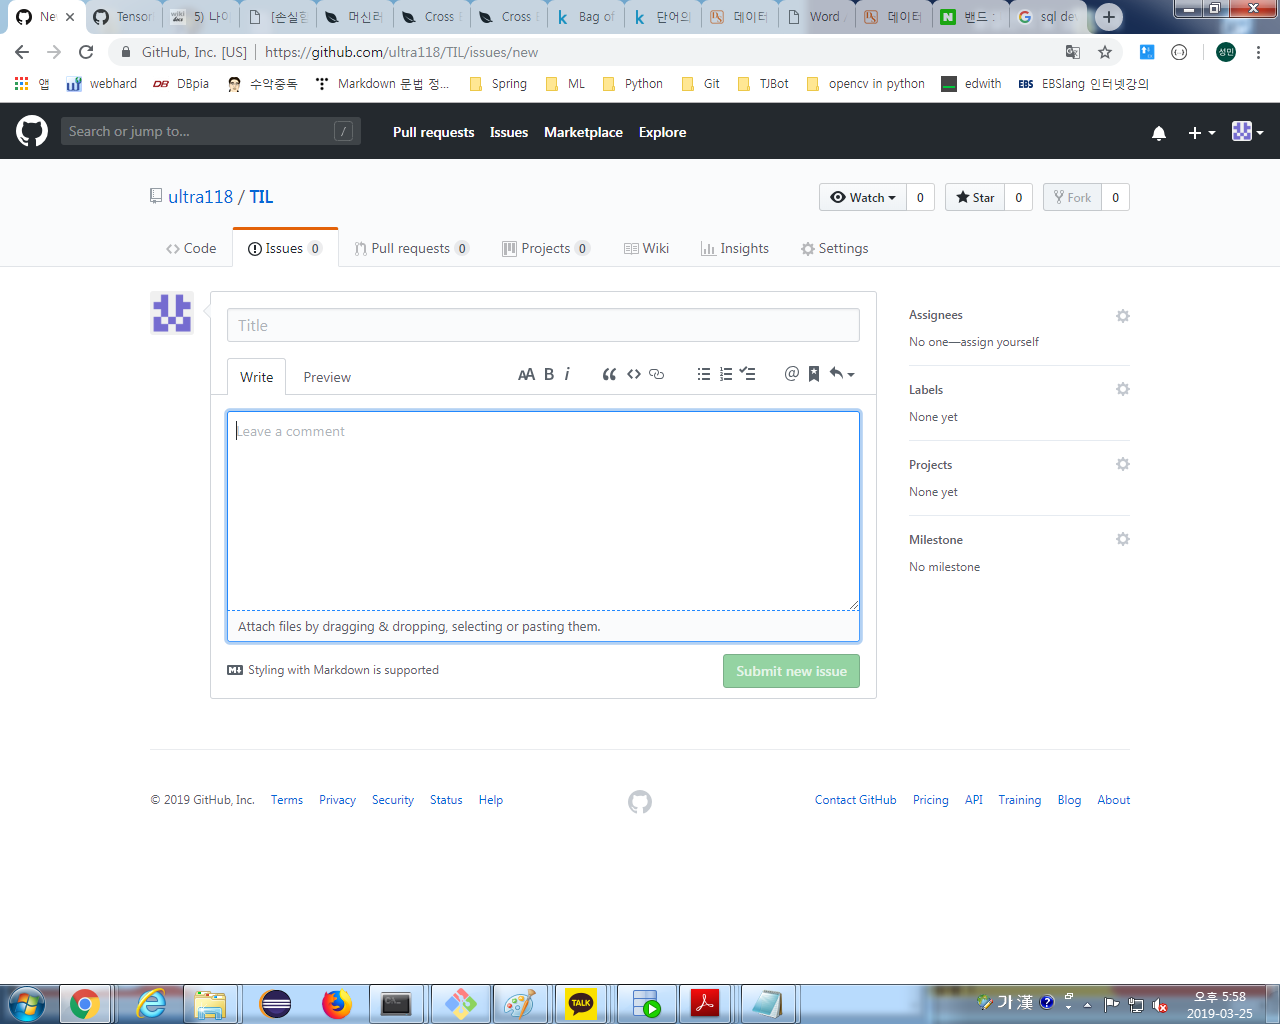

### 

In [1]:
# 참조 : https://github.com/golbin/TensorFlow-Tutorials/blob/master/10%20-%20RNN/02%20-%20Autocomplete.py
# RNN
import tensorflow as tf
import numpy as np

char_arr = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
            'h', 'i', 'j', 'k', 'l', 'm', 'n',
            'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']
# {'a' : 0 , 'b' : 1 ...}
num_dic = {n : i for i,n in enumerate(char_arr)}
dic_len = len(num_dic)

seq_data = ['word', 'wood', 'deep', 'dive', 'cold', 'cool', 'load', 'love', 'kiss', 'kind']

def make_batch(seq_data):
    input_batch = []
    target_batch = []
    
    for seq in seq_data:
        # 마지막 단어 예측위한 input 단어들
        input = [num_dic[n] for n in seq[:-1]]
        # 마지막 단어 예측
        target = num_dic[seq[-1]]
        # np.eyey는 identity matrix를 인자x인자로 만듬
        # 단어에대한 one hot array
        input_batch.append(np.eye(dic_len)[input])
        # sparse_softmax_cross_enropy_wih_logits는 one-hot 인코딩 사용 안함,
        # index를 그냥 넘겨줌
        target_batch.append(target)
    return input_batch, target_batch

learning_rate = 0.01
n_hidden = 128
total_epoch = 5
# RNN을 구성하는 시퀀스의 갯수
n_step = 3
# 알파벳 one-hot 인코딩이므로 26개가 됨
n_input = n_class = dic_len

X = tf.placeholderl([None, n_step, n_input], tf.float32)


In [1]:
# gensim 설치
# pip install gensim
from gensim.models.word2vec import Word2Vec